In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Ne_values = [100, 1000, 10000]
figure_path = "figures"
recomb_case = "constant_recomb" # recomb_case = "recomb_map" is using recombination map

In [15]:
# Load simulated switch count
def load_observed(ne):
    obs_path = f"obs_switches/{recomb_case}/summary_obs_switches_n_{ne}.csv" # UPDATE for variable recombination f"obs_switches/recomb_map/summary_obs_switches_n_{ne}.csv"
    if not os.path.exists(obs_path):
        raise FileNotFoundError(f"No observed summary file found for Ne={ne}")
    return pd.read_csv(obs_path)

In [16]:
# Load theoretical switch count
def load_expected(ne):
    exp_path = f"exp_switches/{recomb_case}/expected_switches_{ne}.csv" # UPDATE for variable recombination f"exp_switches/recomb_map/expected_switches_{ne}.csv"
    if not os.path.exists(exp_path):
        raise FileNotFoundError(f"No expected file found: {exp_path}")
    return pd.read_csv(exp_path)

In [17]:
LABEL_FONTSIZE = 24
TICK_FONTSIZE  = 16
LEGEND_FONTSIZE = 14

sns.set_theme(style="white", palette="colorblind")
palette = sns.color_palette("colorblind")

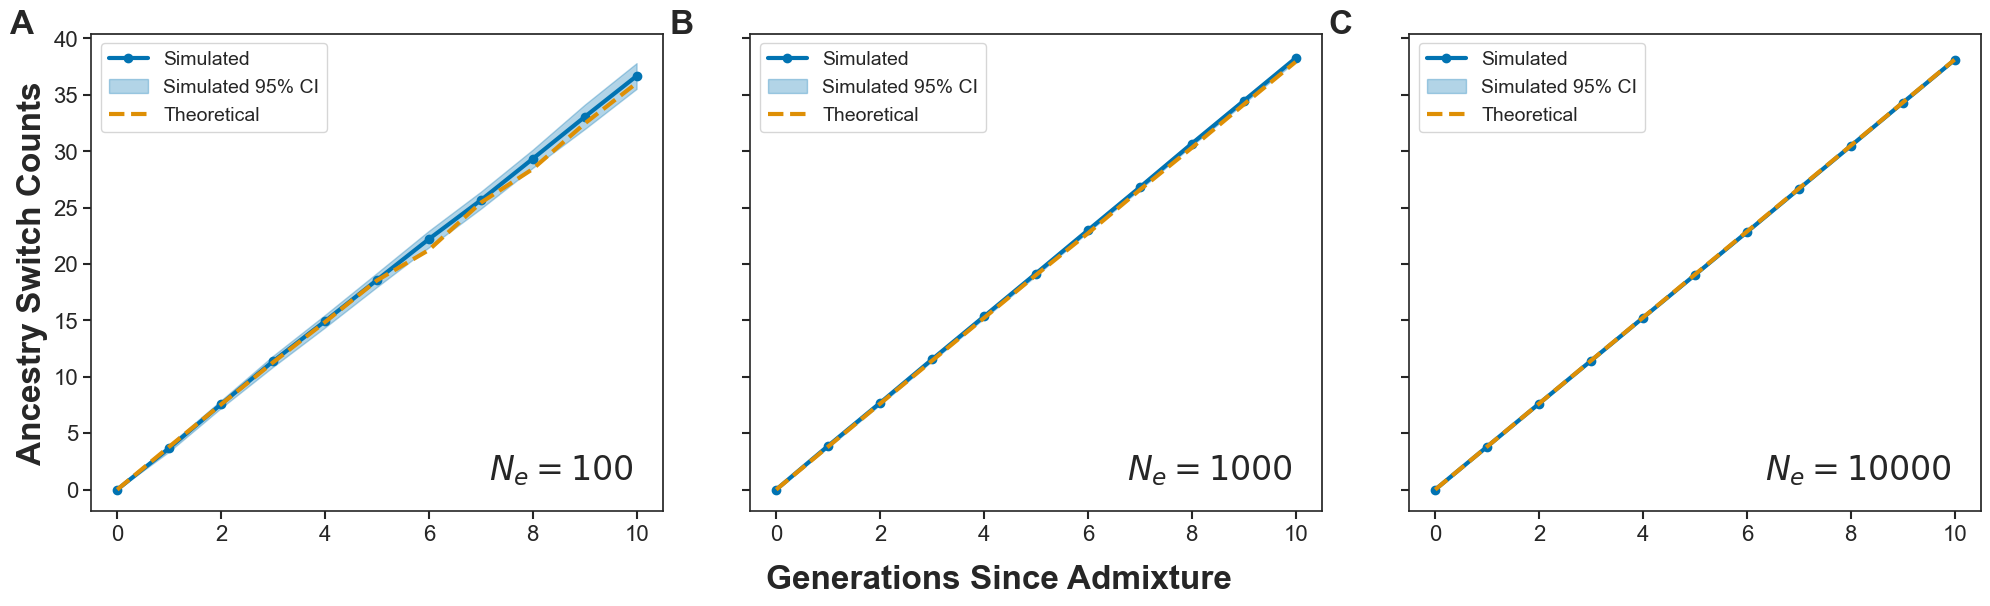

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

panel_labels = ["A", "B", "C"]

for ax, ne, panel in zip(axes, Ne_values, panel_labels):
    # Load data
    df_obs = load_observed(ne)
    exp = load_expected(ne)

    # Plot observed mean + CI
    ax.plot(df_obs["generation"], df_obs["obs_mean"],
            marker="o", linewidth=3, label="Simulated", color=palette[0])
    ax.fill_between(df_obs["generation"], df_obs["obs_ci_lower"], df_obs["obs_ci_upper"],
                    alpha=0.3, label="Simulated 95% CI", color=palette[0])

    # Plot expected
    ax.plot(exp["generation"], exp["expected_switches"],
            linestyle="--", linewidth=3, label="Theoretical", color=palette[1])

    # Y-axis only on first subplot
    if ne == 100:
        ax.set_ylabel("Ancestry Switch Counts", fontsize=LABEL_FONTSIZE, fontweight="bold")

    ax.tick_params(axis="both", which="major",
                   direction="out", length=6, width=1.5,
                   bottom=True, left=True, labelsize=TICK_FONTSIZE)

    for spine in ["left", "bottom"]:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_linewidth(1.2)

    ax.legend(fontsize=LEGEND_FONTSIZE)

    # Add panel letter
    ax.text(-0.1, 1.05, panel, transform=ax.transAxes,
            fontsize=LABEL_FONTSIZE, fontweight="bold", va="top", ha="right")

    # Add N_e pop size labels
    ax.text(0.95, 0.05, f"$N_e={ne}$", transform=ax.transAxes,
            fontsize=LABEL_FONTSIZE, ha="right", va="bottom", fontstyle="italic")

# Shared x-axis label for the whole figure
fig.text(0.5, 0.02, "Generations Since Admixture",
         ha="center", va="center", fontsize=LABEL_FONTSIZE, fontweight="bold")
plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.savefig(os.path.join(figure_path, f"sim_vs_theory_{recomb_case}_pop_sizes_supp.png"), dpi=600) #UPDATE
plt.show()